<a href="https://colab.research.google.com/github/matician255/Restaurant-Rating-Prediction/blob/main/Restaurant_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing neccesary libraries
!pip install missingno
!pip install category_encoders --upgrade
!pip install scikit-learn --upgrade
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import missingno as mn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
#load the dataset
df = pd.read_csv("/content/Dataset .csv")

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [ ]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
df.shape

(9551, 21)

In [ ]:
# create a copy
df1 = df.copy()



In [ ]:
#splitting the datasets
X = df1.drop("Aggregate rating", axis=1)
y = df1["Aggregate rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
# check for missing values
X_train.isnull().sum()
X_test.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,0


In [ ]:
# deleting all rows with null values
X_train = X_train.dropna()

In [ ]:
X_train.shape

(7631, 20)

In [ ]:
#dropping unnecessary features
X_train = X_train.drop(["Restaurant ID", "Restaurant Name", "Address", "Locality Verbose", "Rating color", "Rating text", "Switch to order menu", "Locality", "Country Code"], axis=1)

X_test = X_test.drop(["Restaurant ID", "Restaurant Name", "Address", "Locality Verbose", "Rating color", "Rating text", "Switch to order menu", "Locality", "Country Code"], axis=1)

In [ ]:
# outliers check

def outlier_check(data, feature):
  # Calculate the quantiles
  Q1 = data[feature].quantile(0.25)
  Q3 = data[feature].quantile(0.75)

  #calculate the inter quantile range
  IQR = Q3 - Q1

  #Calculate the lower and upper limit
  lower_limit = Q1 - (1.5 * IQR)
  upper_limit = Q3 + (1.5 * IQR)

  Outliers = (data[feature] < lower_limit) | (data[feature] > upper_limit)

  #outliers count
  outliers_count = Outliers.sum()

  #visualizing the outliers
  sns.boxplot(x=data[feature])
  plt.title(f"Outliers in {feature}")
  plt.show()

  print(f"Total number of outliers in {feature}: {outliers_count}")
  print(f"Total number of {feature}: {len(data[feature])}")
  print(f"Percentage of outliers in {feature}: {outliers_count/len(data[feature])*100}")

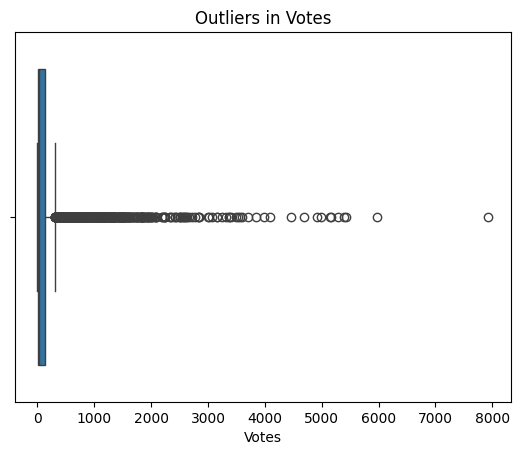

Total number of outliers in Votes: 920
Total number of Votes: 7631
Percentage of outliers in Votes: 12.056087013497576


In [ ]:
X_train_votes_outliers = outlier_check(X_train, "Votes")

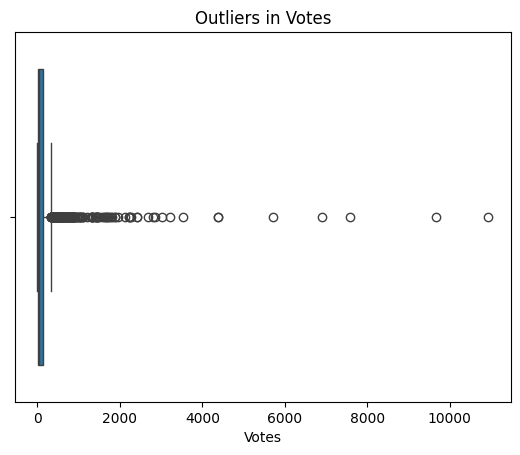

Total number of outliers in Votes: 210
Total number of Votes: 1911
Percentage of outliers in Votes: 10.989010989010989


In [ ]:
X_test_votes_outliers = outlier_check(X_test, "Votes")

In [ ]:
# handling the outliers using robust scaler
"""i use robust scaler because it uses IQR thus making it less sensitive to the outliers which are significant"""

# for train_x
X_train.loc[:,"Votes"] = X_train["Votes"].astype("float64")
robust_scaler = RobustScaler()
X_train.loc[:,"Votes"] = robust_scaler.fit_transform(X_train[["Votes"]])

# for test_x
# we use transform only to avoid data leakage during model training and maintain consistency in data

X_test.loc[:,"Votes"] = X_test["Votes"].astype("float64")
X_test.loc[:,"Votes"] = robust_scaler.transform(X_test[["Votes"]])


<ipython-input-15-6f84f0d66c76>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.13709677  2.07258065 -0.18548387 ...  0.75806452 -0.12096774
 -0.05645161]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.loc[:,"Votes"] = robust_scaler.fit_transform(X_train[["Votes"]])
<ipython-input-15-6f84f0d66c76>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.10483871 -0.22580645 -0.16129032 ...  3.2983871  -0.24193548
 -0.24193548]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_test.loc[:,"Votes"] = robust_scaler.transform(X_test[["Votes"]])


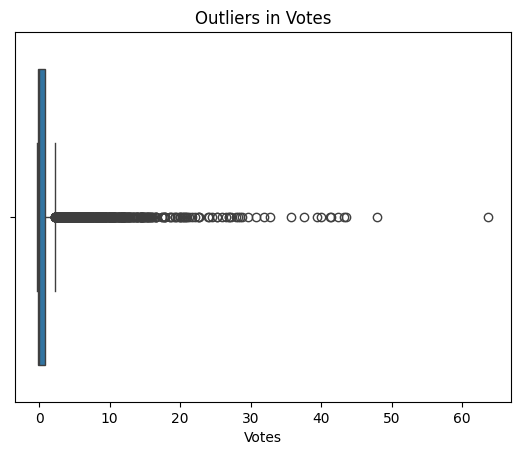

Total number of outliers in Votes: 920
Total number of Votes: 7631
Percentage of outliers in Votes: 12.056087013497576


In [ ]:
# see the effect after handling the outliers
X_train_votes_outliers = outlier_check(X_train, "Votes")


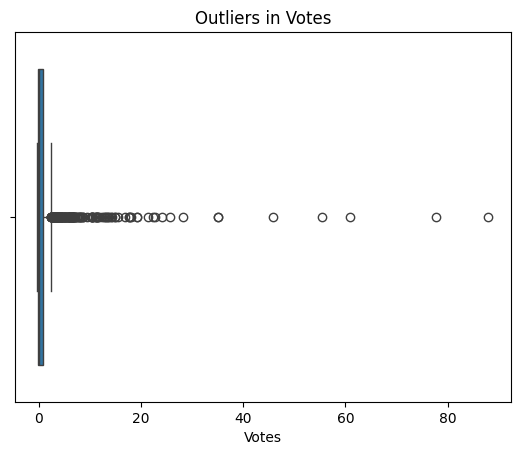

Total number of outliers in Votes: 210
Total number of Votes: 1911
Percentage of outliers in Votes: 10.989010989010989


In [ ]:
X_test_votes_outliers = outlier_check(X_test, "Votes")

In [ ]:
# getting unique currencies
len(X_train["Currency"].unique())

12

In [ ]:
len(X_test["Currency"].unique())

12

In [ ]:
# Check for zeros or negatives in the original data
has_zeros_or_negatives = (X_train["Average Cost for two"] <= 0).any()
zeros_or_negatives = X_train[X_train["Average Cost for two"] <= 0]
print(has_zeros_or_negatives)


# Calculate the percentage of rows with zeros or negatives
total_rows = len(X_train)
invalid_rows = len(zeros_or_negatives)
percentage_invalid = (invalid_rows / total_rows) * 100

print(f"\nPercentage of rows with zeros or negatives: {percentage_invalid:.2f}%")

True

Percentage of rows with zeros or negatives: 0.18%


In [ ]:
# Check for zeros or negatives in the test data
has_zeros_or_negatives = (X_test["Average Cost for two"] <= 0).any()
zeros_or_negatives = X_test[X_test["Average Cost for two"] <= 0]
print(has_zeros_or_negatives)


# Calculate the percentage of rows with zeros or negatives
total_rows = len(X_test)
invalid_rows = len(zeros_or_negatives)
percentage_invalid = (invalid_rows / total_rows) * 100

print(f"\nPercentage of rows with zeros or negatives: {percentage_invalid:.2f}%")

True

Percentage of rows with zeros or negatives: 0.05%


In [ ]:
"""
since we have zeros in our average cost column and they are nearly unsignificant am going to drop them
"""

# Drop rows with zeros, negatives, or inf
X_train = X_train[
    (X_train["Average Cost for two"] > 0) &  # Keep only positive values
    (~np.isinf(X_train["Average Cost for two"]))  # Exclude inf and -inf
]

X_test = X_test[
    (X_test["Average Cost for two"] > 0) &  # Keep only positive values
    (~np.isinf(X_test["Average Cost for two"]))  # Exclude inf and -inf
]

In [ ]:
# Check again to confirm
has_zeros_or_negatives = (X_train["Average Cost for two"] <= 0).any()
print(has_zeros_or_negatives)


False


In [ ]:
has_zeros_or_negatives = (X_test["Average Cost for two"] <= 0).any()
print(has_zeros_or_negatives)

False


In [ ]:
# handling the outliers
""" The issue here is that we are dealing with average cost in different currencies
thus leading to extreme data differences in cost column so first we convert all the currencies to USD then check for outliers again"""

import requests


API_KEY = 'f9ac2e0ce1e1488bbe9b2cd1e71a999b'
url = f'https://openexchangerates.org/api/latest.json?app_id={API_KEY}'

# Fetch data
response = requests.get(url)
data = response.json()

# Extract exchange rates
exchange_rates = data['rates']

# Print rates for specific currencies
currencies = ['BWP', 'BRL', 'AED', 'INR', 'IDR', 'NZD', 'GBP', 'QAR', 'ZAR', 'LKR', 'TRY']
for currency in currencies:
    print(f"1 USD = {exchange_rates[currency]:.2f} {currency}")




1 USD = 13.96 BWP
1 USD = 5.84 BRL
1 USD = 3.67 AED
1 USD = 87.10 INR
1 USD = 16339.69 IDR
1 USD = 1.78 NZD
1 USD = 0.81 GBP
1 USD = 3.62 QAR
1 USD = 18.75 ZAR
1 USD = 297.55 LKR
1 USD = 35.99 TRY


In [ ]:
#create a dictionary based on latest prices

exchange_rates_dic = {
  'Dollar($)': 1,
  'Botswana Pula(P)': 13.85,
  'Brazilian Real(R$)': 5.88,
  'Emirati Diram(AED)': 3.67,
  'Indian Rupees(Rs.)': 8.64,
  'Indonesian Rupiah(IDR)': 16277.21,
  'NewZealand($)': 1.77,
  'Pounds(��)': 0.81,
  'Qatari Rial(QR)': 3.64,
  'Rand(R)':18.59,
  'Sri Lankan Rupee(LKR)': 297.38,
  'Turkish Lira(TL)': 35.78,
}


# Convert to base currency (USD)
X_train.loc[:,'Average Cost for two (USD)'] = X_train.apply(lambda row: row['Average Cost for two'] / exchange_rates_dic[row['Currency']], axis=1)

In [ ]:
X_test.loc[:,'Average Cost for two (USD)'] = X_test.apply(lambda row: row['Average Cost for two'] / exchange_rates_dic[row['Currency']], axis=1)

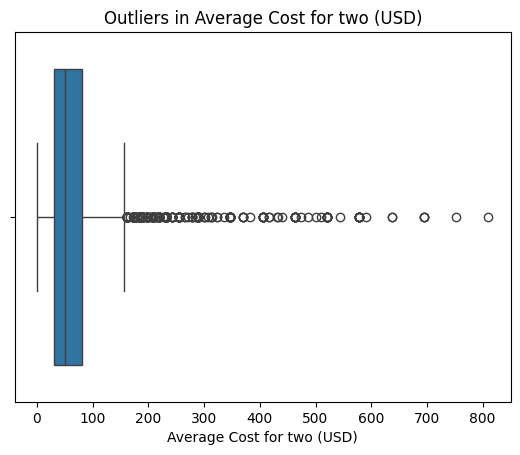

Total number of outliers in Average Cost for two (USD): 644
Total number of Average Cost for two (USD): 7617
Percentage of outliers in Average Cost for two (USD): 8.454772220034135


In [ ]:
train_average_usd_outlier = outlier_check(X_train, "Average Cost for two (USD)")

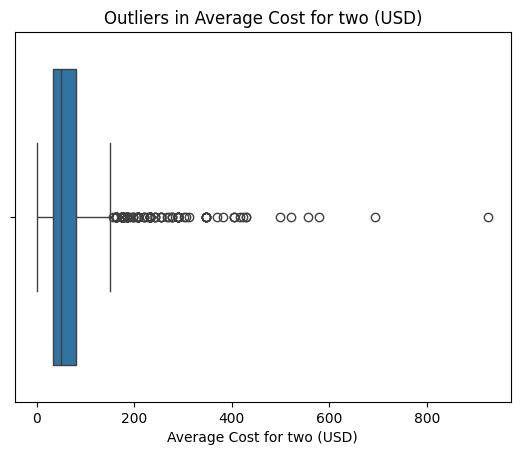

Total number of outliers in Average Cost for two (USD): 175
Total number of Average Cost for two (USD): 1910
Percentage of outliers in Average Cost for two (USD): 9.162303664921465


In [ ]:
test_average_usd_outlier = outlier_check(X_test, "Average Cost for two (USD)")

In [ ]:
# handling the outlies
"""
since the price can be high in some restaurants then i will use log transformation so as to preserve the effect of the outliers
"""
X_train["Average Cost for two (USD)"] = np.log(X_train["Average Cost for two (USD)"])


In [ ]:
X_test["Average Cost for two (USD)"] = np.log(X_test["Average Cost for two (USD)"])

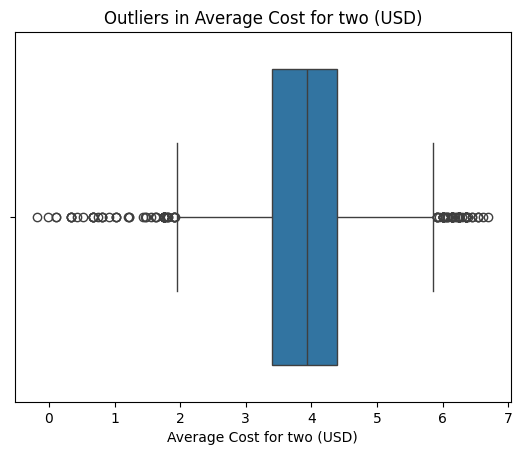

Total number of outliers in Average Cost for two (USD): 125
Total number of Average Cost for two (USD): 7617
Percentage of outliers in Average Cost for two (USD): 1.6410660364973086


In [ ]:
#check the effect
train_average_usd_outlier = outlier_check(X_train, "Average Cost for two (USD)")

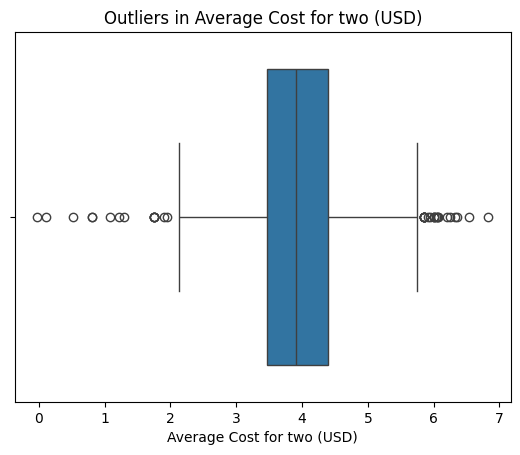

Total number of outliers in Average Cost for two (USD): 38
Total number of Average Cost for two (USD): 1910
Percentage of outliers in Average Cost for two (USD): 1.9895287958115182


In [ ]:
test_average_usd_outlier = outlier_check(X_test, "Average Cost for two (USD)")

In [ ]:
X_train.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,Average Cost for two (USD)
2191,Gurgaon,77.083835,28.506391,"North Indian, Chinese",650,Indian Rupees(Rs.),No,No,No,2,-0.137097,4.320570
9478,Pretoria,28.257131,-25.778387,"European, South African, Steak",450,Rand(R),No,No,No,4,2.072581,3.186624
2691,New Delhi,77.172916,28.693327,Fast Food,350,Indian Rupees(Rs.),No,Yes,No,1,-0.185484,3.701531
2069,Gurgaon,77.067268,28.266839,"Chinese, North Indian, Mughlai",600,Indian Rupees(Rs.),No,No,No,2,0.080645,4.240527
8369,Noida,77.308422,28.578968,"North Indian, Chinese, Thai, Continental",1500,Indian Rupees(Rs.),Yes,Yes,No,3,2.403226,5.156818


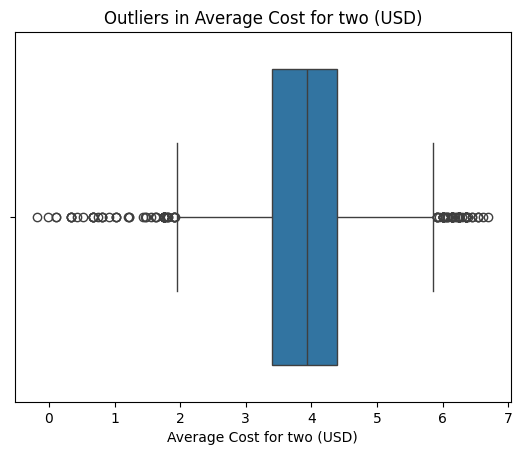

Total number of outliers in Average Cost for two (USD): 125
Total number of Average Cost for two (USD): 7617
Percentage of outliers in Average Cost for two (USD): 1.6410660364973086


In [ ]:
train_average_usd_outlier = outlier_check(X_train, "Average Cost for two (USD)")

So far there is improvement in handling my outliers in votes and average cost in usd which dropped from 12.05% to 11.98% in votes and 8.45% to 1.64% in average cost in usd which is decent considering i chose the methods which didnt affect much the outliers so as not to lose their domain significance

In [ ]:
#location cluster feature creation for train data

#normalization of latitude and longitude
scaler = StandardScaler()
X_train[["Longitude", "Latitude"]] = scaler.fit_transform(X_train[["Longitude", "Latitude"]])

#KMean clustering
kmeans = KMeans(n_clusters=3)
X_train["location_cluster"] = kmeans.fit_predict(X_train[["Longitude", "Latitude"]])

In [ ]:
#location cluster feature creation for test data

#normalization of latitude and longitude
X_test[["Longitude", "Latitude"]] = scaler.transform(X_test[["Longitude", "Latitude"]])

#KMean clustering
X_test["location_cluster"] = kmeans.predict(X_test[["Longitude", "Latitude"]])

In [ ]:
# performing one_hot encoding
X_train = pd.get_dummies(X_train, columns=["Has Table booking", "Has Online delivery", "Is delivering now"])

In [ ]:
X_test = pd.get_dummies(X_test, columns=["Has Table booking", "Has Online delivery", "Is delivering now"])

In [ ]:
# frequency encoding for train cuisines

# Split the "Cuisines" column into individual cuisines
X_train["Cuisines"] = X_train["Cuisines"].str.split(", ")

# Calculate frequency of each cuisine
cuisine_counts = X_train["Cuisines"].explode().value_counts(normalize=True)

total_rows = len(X_train)  # Total number of rows in the dataset
cuisine_frequency = cuisine_counts / total_rows

# Replace each cuisine with its frequency
X_train["Cuisines_encoded"] = X_train["Cuisines"].apply(lambda x: sum(cuisine_frequency[cuisine] for cuisine in x))



In [ ]:
# frequency encoding for test cuisines

# Split the "Cuisines" column into individual cuisines
X_test["Cuisines"] = X_test["Cuisines"].str.split(", ")

# Calculate frequency of each cuisine
cuisine_counts = X_test["Cuisines"].explode().value_counts(normalize=True)

total_rows = len(X_test)  # Total number of rows in the dataset
cuisine_frequency = cuisine_counts / total_rows

# Replace each cuisine with its frequency
X_test["Cuisines_encoded"] = X_test["Cuisines"].apply(lambda x: sum(cuisine_frequency[cuisine] for cuisine in x))

In [ ]:
"""
over the past preprocessing steps we have dropped some rows in x_train and x_test but
y_train and y_test is still having original number of rows so there is a mismatch
it is critical to match them before performing the target encoding unless
we get mismatch error
"""
# Align X_train and y_train indices

# Get the common index between X_train and y_train
common_index = X_train.index.intersection(y_train.index)

# Reindex both X_train and y_train using the common index
X_train = X_train.reindex(common_index)
y_train = y_train.reindex(common_index)

# Align X_test and y_test indices

# Get the common index between X_train and y_train
common_index = X_test.index.intersection(y_test.index)

# Reindex both X_train and y_train using the common index
X_test = X_test.reindex(common_index)
y_test = y_test.reindex(common_index)

In [ ]:
X_train.shape

(7617, 17)

In [ ]:
y_train.shape

(7617,)

In [ ]:
X_test.shape

(1910, 17)

In [ ]:
y_test.shape

(1910,)

In [ ]:
# target encoding for train city


# Initialize TargetEncoder with smoothing
target_encoder = TargetEncoder(smoothing=1.0)  # Smoothing factor = 1.0

# Fit and transform the "City" feature
X_train["City_encoded"] = target_encoder.fit_transform(X_train["City"], y_train)


In [ ]:
# target encoding for test city

# transform the "City" feature
X_test["City_encoded"] = target_encoder.transform(X_test["City"], y_test)


In [ ]:
#  LETS DROP ALL FEATURES THAT WE NO LONGER REQUIRE AFTER PREPROCESSING
X_train = X_train.drop(["Currency", "City", "Cuisines", "Longitude", "Latitude", "Average Cost for two"], axis=1)


In [ ]:
X_test = X_test.drop(["Currency", "City", "Cuisines", "Longitude", "Latitude", "Average Cost for two"], axis=1)

In [ ]:
X_train.head()

,Price range,Votes,Average Cost for two (USD),location_cluster,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Cuisines_encoded,City_encoded
2191,2,-0.137097,4.320570,0,True,False,True,False,True,False,0.000045,2.682986
9478,4,2.072581,3.186624,1,True,False,True,False,True,False,0.000001,2.848833
2691,1,-0.185484,3.701531,0,True,False,False,True,True,False,0.000013,2.427692
2069,2,0.080645,4.240527,0,True,False,True,False,True,False,0.000051,2.682986
8369,3,2.403226,5.156818,0,False,True,False,True,True,False,0.000051,2.036146


In [ ]:
X_test.head()

,Price range,Votes,Average Cost for two (USD),location_cluster,Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Cuisines_encoded,City_encoded
6857,1,-0.104839,2.448768,0,True,False,True,False,True,False,0.000122,2.427692
5066,2,-0.225806,4.240527,0,True,False,True,False,True,False,0.000204,2.427692
8489,1,-0.161290,3.365058,0,True,False,True,False,True,False,0.000107,2.036146
420,1,5.362903,2.302585,2,True,False,True,False,True,False,0.000012,2.674590
3871,3,1.008065,5.013717,0,False,True,True,False,True,False,0.000204,2.427692


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# calculating the baseline MSE
baseline_mse = mean_squared_error(y_train, np.full(len(y_train), y_train.mean()))
print("Baseline MSE:", baseline_mse)


Baseline MSE: 2.3026548855662696


In [ ]:


# Initialize Random Forest Regressor
rating_model = RandomForestRegressor(random_state=40)

# Train the model
rating_model.fit(X_train, y_train)

# Check feature importance
print("Feature Importances:", rating_model.feature_importances_)

# Make predictions
y_pred = rating_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Random Forest MSE:", mse)

Feature Importances: [2.59250025e-03 9.55472030e-01 9.96590326e-03 1.54217851e-03
 4.67099364e-04 4.44053067e-04 1.12492290e-03 1.11042192e-03
 4.37110114e-05 4.98158953e-05 1.64619523e-02 1.07254119e-02]
Random Forest MSE: 0.11692682322364567


In [ ]:
from xgboost import XGBRegressor

# Initialize XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("XGBoost MSE:", mse)

XGBoost MSE: 0.1268802870261352
